# Herkunftsländer der Arbeitnehmer

In [55]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from shapely.geometry import Point, Polygon
plt.style.use('../own_style.mplstyle')
from geopandas import GeoDataFrame
import geopandas
import mapclassify




In [56]:
#cleanup.generate_cleaned_df()


In [57]:

col_list = ["country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)


In [58]:
visas_df = visas_df["country_of_citizenship"].value_counts()

In [59]:
visas_df.head()

INDIA          205158
CHINA           28861
SOUTH KOREA     24761
CANADA          14804
MEXICO           8961
Name: country_of_citizenship, dtype: int64

In [60]:
web_table = pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2', match='Country name', keep_default_na=False)
states_abbreviations_df = web_table[0]

In [61]:

states_abbreviations_df = states_abbreviations_df[["Code","Country name (using title case)" ]]

In [62]:

states_abbreviations_df["Country name (using title case)"] = states_abbreviations_df["Country name (using title case)"].str.upper()

<ipython-input-62-b42afdf12b85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  states_abbreviations_df["Country name (using title case)"] = states_abbreviations_df["Country name (using title case)"].str.upper()


In [63]:
states_abbreviations_df


,Code,Country name (using title case)
0,AD,ANDORRA
1,AE,UNITED ARAB EMIRATES
2,AF,AFGHANISTAN
3,AG,ANTIGUA AND BARBUDA
4,AI,ANGUILLA
...,...,...
244,YE,YEMEN
245,YT,MAYOTTE
246,ZA,SOUTH AFRICA
247,ZM,ZAMBIA


In [64]:

visas_df = visas_df.to_frame()

In [65]:
visas_df.reset_index(level=0, inplace=True)


In [66]:
visas_df


,index,country_of_citizenship
0,INDIA,205158
1,CHINA,28861
2,SOUTH KOREA,24761
3,CANADA,14804
4,MEXICO,8961
...,...,...
197,KIRIBATI,1
198,LIECHTENSTEIN,1
199,SOMALIA,1
200,CHAD,1


In [67]:
visas_df = visas_df.merge(states_abbreviations_df, left_on='index', right_on="Country name (using title case)")

In [68]:
visas_df

,index,country_of_citizenship,Code,Country name (using title case)
0,INDIA,205158,IN,INDIA
1,CHINA,28861,CN,CHINA
2,CANADA,14804,CA,CANADA
3,MEXICO,8961,MX,MEXICO
4,PHILIPPINES,8631,PH,PHILIPPINES
...,...,...,...,...
161,ARUBA,1,AW,ARUBA
162,KIRIBATI,1,KI,KIRIBATI
163,LIECHTENSTEIN,1,LI,LIECHTENSTEIN
164,SOMALIA,1,SO,SOMALIA


In [69]:
web_table2 = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv', match='country', keep_default_na=False)

In [70]:
web_table2 = web_table2[0]

In [71]:

web_table2

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.93911,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.8275,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [72]:
visas_df = visas_df.merge(web_table2, left_on='Code', right_on="country")

In [73]:
visas_df

,index,country_of_citizenship,Code,Country name (using title case),country,latitude,longitude,name
0,INDIA,205158,IN,INDIA,IN,20.593684,78.96288,India
1,CHINA,28861,CN,CHINA,CN,35.86166,104.195397,China
2,CANADA,14804,CA,CANADA,CA,56.130366,-106.346771,Canada
3,MEXICO,8961,MX,MEXICO,MX,23.634501,-102.552784,Mexico
4,PHILIPPINES,8631,PH,PHILIPPINES,PH,12.879721,121.774017,Philippines
...,...,...,...,...,...,...,...,...
160,ARUBA,1,AW,ARUBA,AW,12.52111,-69.968338,Aruba
161,KIRIBATI,1,KI,KIRIBATI,KI,-3.370417,-168.734039,Kiribati
162,LIECHTENSTEIN,1,LI,LIECHTENSTEIN,LI,47.166,9.555373,Liechtenstein
163,SOMALIA,1,SO,SOMALIA,SO,5.152149,46.199616,Somalia


In [74]:
visas_df["latitude"] = visas_df["latitude"].astype("float")
visas_df["longitude"] = visas_df["longitude"].astype("float")

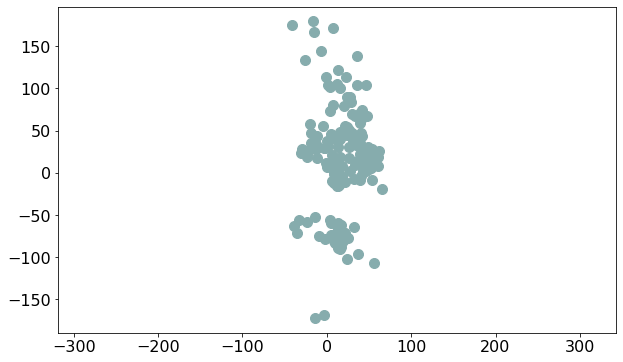

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(visas_df["latitude"], visas_df["longitude"])
ax.axis('equal')
plt.show()

In [76]:

visas_df["country_of_citizenship"] = visas_df["country_of_citizenship"].astype(("float"))

In [77]:
visas_df = GeoDataFrame(visas_df)

In [78]:
visas_df


,index,country_of_citizenship,Code,Country name (using title case),country,latitude,longitude,name
0,INDIA,205158.0,IN,INDIA,IN,20.593684,78.962880,India
1,CHINA,28861.0,CN,CHINA,CN,35.861660,104.195397,China
2,CANADA,14804.0,CA,CANADA,CA,56.130366,-106.346771,Canada
3,MEXICO,8961.0,MX,MEXICO,MX,23.634501,-102.552784,Mexico
4,PHILIPPINES,8631.0,PH,PHILIPPINES,PH,12.879721,121.774017,Philippines
...,...,...,...,...,...,...,...,...
160,ARUBA,1.0,AW,ARUBA,AW,12.521110,-69.968338,Aruba
161,KIRIBATI,1.0,KI,KIRIBATI,KI,-3.370417,-168.734039,Kiribati
162,LIECHTENSTEIN,1.0,LI,LIECHTENSTEIN,LI,47.166000,9.555373,Liechtenstein
163,SOMALIA,1.0,SO,SOMALIA,SO,5.152149,46.199616,Somalia


In [79]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [80]:
visas_df=pd.merge(world,visas_df,on='name')

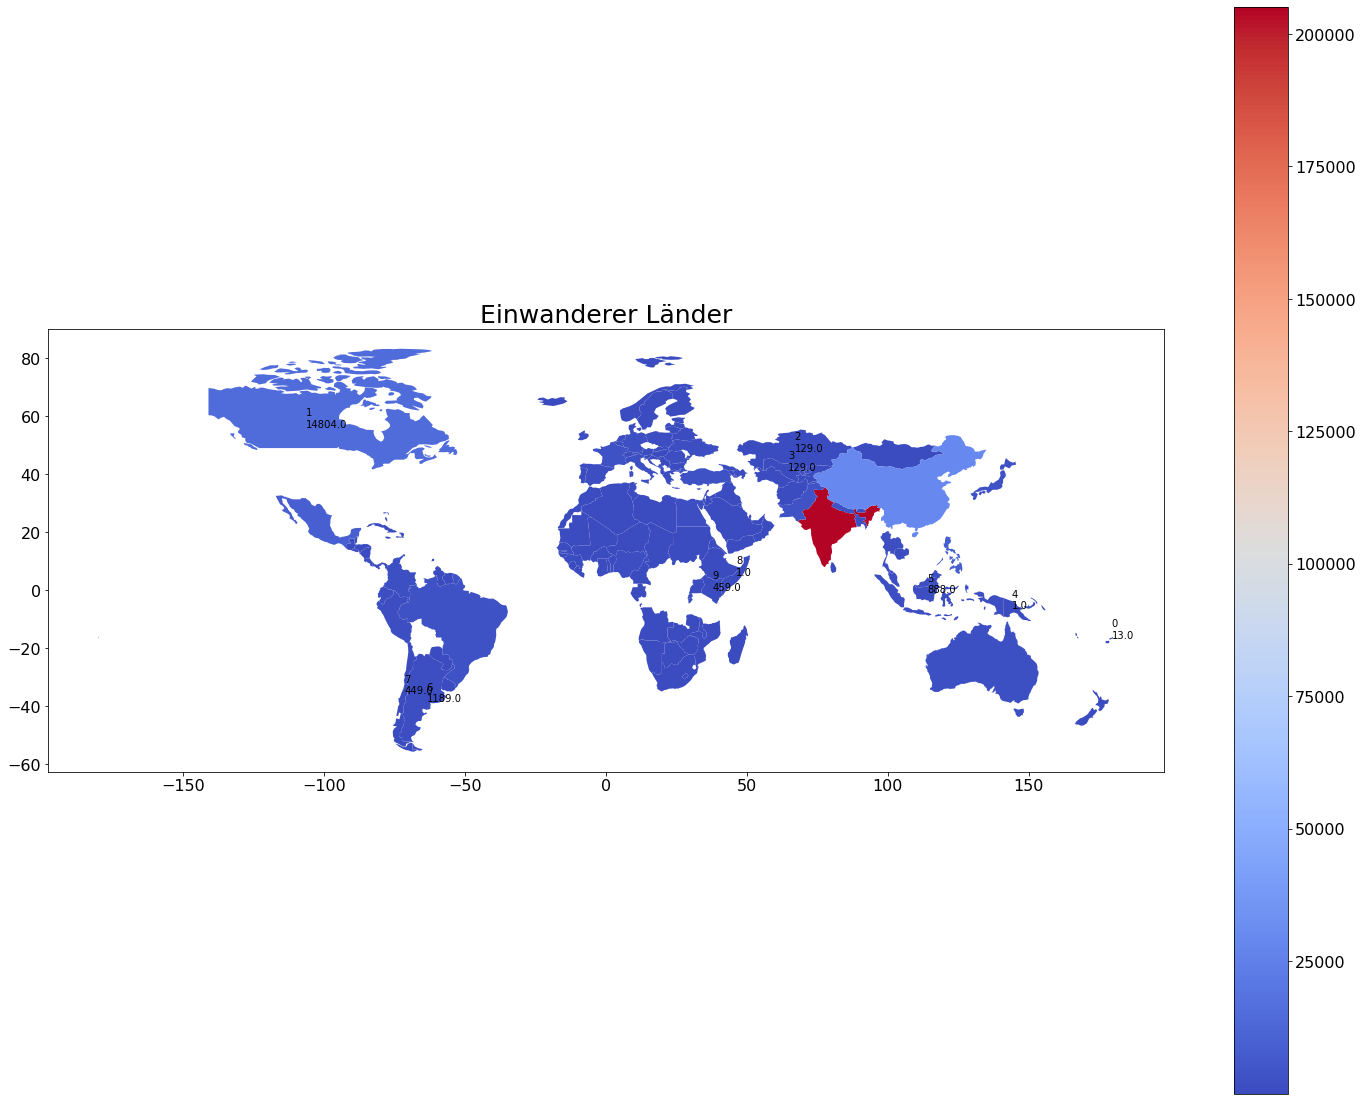

In [97]:
# plot confirmed cases world map
visas_df.plot(column='country_of_citizenship',
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('Einwanderer Länder',fontsize=25)
# add countries names and numbers
for i in range(0,10):
    plt.text(float(visas_df.longitude[i]),float(visas_df.latitude[i]),"{}\n{}".format(visas_df.index[i],visas_df.country_of_citizenship[i]),size=10)

plt.show()

In [98]:
#https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b